## **Diskirminasi menggunakan K-means**

### **Pengertian Diskritisasi (Discretization)**

Diskritisasi
merupakan proses kuantisasi sifat-sifat kontinu.
Kuantisasi diartikan sebagai proses
pengelompokan sifat-sifat kontinu pada selangselang tertentu (step size). Kegunaan diskritisasi
adalah untuk mereduksi dan menyederhanakan
data, sehingga didapatkan data diskrit yang lebih
mudah dipahami, digunakan, dan dijelaskan.
Oleh karena itu, hasil pembelajaran dengan
bentuk diskrit dipandang Dougherty (1995)
sebagai hasil yang cepat dan akurat
dibandingkan hasil dari bentuk kontinu (Liu,
Hussain, Tan, & Dash, 2012)
Proses ini bertujuan untuk mereduksi dan menyederhanakan data sehingga menjadi lebih mudah dipahami, digunakan, dan dijelaskan
proses di mana kita dapat mengubah variabel kontinu, model atau fungsi menjadi bentuk diskrit. kita dapat melakukan ini dengan membuat satu set interval yang berdekatan yang melintasi rentang variabel / model / fungsi yang diinginkan.

Diskritisasi memiliki kegunaan penting dalam berbagai metode lain, terutama dalam metode numerik untuk menyelesaikan masalah yang awalnya berbentuk kontinu menjadi bentuk diskrit yang dapat dihitung secara numerik salah satunya Dalam data mining dan pembelajaran mesin, diskritisasi digunakan untuk mengubah data numerik kontinu menjadi data kategorik, yang dapat meningkatkan akurasi klasifikasi dan mempercepat proses mining data, misalnya dalam metode decision tree dengan teknik diskritisasi seperti equal-width interval atau clustering-based discretization.

Dari beberapa metode pengolahan data baik tahap understanding, proseccing atau yang lain, deskritisasi sangat perlu digunakan dalam tahapan tersebut. contoh paada metode K-Means,Diskritisasi dengan K-Means dianggap lebih baik dibandingkan metode diskritisasi interval sama (equal interval) karena mampu menangani batas nilai dengan lebih baik dan menghasilkan distribusi cluster yang lebih seimbang. Namun, hasil diskritisasi sangat bergantung pada nilai k dan inisialisasi centroid awal, serta dapat terpengaruh oleh outlier data. Kelemahan lain adalah K-Means mengasumsikan cluster berbentuk bulat dan ukuran serta densitas cluster seragam, sehingga kurang cocok untuk data dengan cluster yang berbeda bentuk atau kepadatan.

Secara umum, diskritisasi dengan K-Means banyak digunakan sebagai preprocessing untuk meningkatkan akurasi algoritma klasifikasi seperti Naïve Bayes dan decision tree dengan mengubah atribut numerik menjadi kategorikal yang lebih mudah diolah.

Berikut ini diberikan sebuah contoh data iris, Membuat klasifikasi menggunakan data yang kategori dengan data belum kategori

##  **Klasifikasi 1**


### **Mengumpulkan data Iris**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Fungsi ambil data Iris dan atur ulang kolom
def get_iris_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df["class"] = pd.Categorical.from_codes(iris.target, iris.target_names)
    df["id"] = df.index + 1  # ID dimulai dari 1

    # Susun ulang kolom: id, class, lalu fitur
    columns_order = ["id", "class"] + iris.feature_names
    df = df[columns_order]
    return df

# Ambil data
df_iris = get_iris_data()

# Muat data Iris
iris = load_iris()
X = iris.data  # Semua fitur: shape (150, 4)
feature_names = iris.feature_names

# Cetak tanpa indeks
print(df_iris.to_string(index=False))

 id      class  sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
  1     setosa                5.1               3.5                1.4               0.2
  2     setosa                4.9               3.0                1.4               0.2
  3     setosa                4.7               3.2                1.3               0.2
  4     setosa                4.6               3.1                1.5               0.2
  5     setosa                5.0               3.6                1.4               0.2
  6     setosa                5.4               3.9                1.7               0.4
  7     setosa                4.6               3.4                1.4               0.3
  8     setosa                5.0               3.4                1.5               0.2
  9     setosa                4.4               2.9                1.4               0.2
 10     setosa                4.9               3.1                1.5               0.1
 11     setosa       

### **Klasifikasi menggunakan naive bayes**

**IDENTIFIKASI**

Setelah data iris dikumpulakan klasifikasikan dengan metode naive bayes dan PCA.Tujuan dari penggunaan metode kombinasi Principal Component Analysis (PCA) dan Naive Bayes pada data Iris adalah untuk mereduksi dimensi fitur dari empat (sepal length, sepal width, petal length, dan petal width) menjadi dua dimensi utama (PC1 dan PC2), sehingga data dapat divisualisasikan secara 2D. PCA membantu menyederhanakan data tanpa kehilangan terlalu banyak informasi penting, sementara Naive Bayes digunakan untuk melakukan klasifikasi berdasarkan distribusi probabilitas dari data. Dengan menampilkan hasil klasifikasi dalam bentuk plot dua dimensi, kita dapat memahami sejauh mana model mampu memisahkan kelas-kelas bunga berdasarkan dua komponen utama tersebut.

**HASIL & INTERPRETASI**

Hasil visualisasi menunjukkan bahwa setosa sangat mudah dibedakan dari kelas lain karena titik-titiknya berkelompok jelas di area tertentu, baik berdasarkan label asli maupun prediksi model. Namun, versicolor dan virginica sering kali tampak tumpang tindih di ruang dua dimensi, yang menyebabkan beberapa kesalahan klasifikasi oleh model Naive Bayes. Meski demikian, secara umum prediksi model cukup akurat karena sebagian besar titik memiliki warna (prediksi) dan bentuk (label asli) yang sama. Hal ini menunjukkan bahwa PCA cukup efektif dalam merangkum informasi penting dari data dan Naive Bayes mampu memanfaatkan informasi tersebut untuk klasifikasi, meskipun ada keterbatasan ketika kelas-kelas memiliki distribusi yang saling tumpang tindih. Berikut implementasi bentuk code:



In [ ]:
# Siapkan fitur dan label
X = df_iris[feature_names]  # fitur numerik asli
y = df_iris["class"]        # label kelas (setosa, versicolor, virginica)

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Prediksi data uji
y_pred = nb_model.predict(X_test)

# Evaluasi hasil klasifikasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Akurasi:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Akurasi: 1.0


### **Klasifikasi menggunakan DecisionTree**

**IDENTIFIKASI**

Tujuan dari penerapan Decision Tree pada dataset Iris adalah untuk membangun model klasifikasi yang dapat menjelaskan secara eksplisit proses pengambilan keputusan berdasarkan fitur-fitur sepal dan petal. Decision Tree bekerja dengan mempartisi data ke dalam cabang-cabang berdasarkan nilai ambang batas fitur yang memaksimalkan pemisahan antar kelas. Tidak seperti Naive Bayes yang mengasumsikan distribusi probabilitas, Decision Tree memberikan pendekatan yang sangat interpretatif, memungkinkan kita untuk melihat logika keputusan dalam bentuk diagram pohon. Visualisasi ini sangat berguna untuk memahami fitur mana yang paling berpengaruh dalam membedakan kelas bunga.

**HASIL & INTERPRETASI**

Hasil evaluasi menunjukkan bahwa model Decision Tree menghasilkan akurasi tinggi, biasanya setara atau sedikit lebih baik dibanding Naive Bayes, tergantung pada pemisahan data training dan testing. Confusion matrix dan classification report memperlihatkan bahwa klasifikasi untuk setosa sangat akurat, sementara beberapa kesalahan klasifikasi mungkin terjadi pada kelas versicolor dan virginica yang memiliki kemiripan karakteristik. Visualisasi pohon keputusan menunjukkan secara langsung urutan fitur yang digunakan untuk membelah data serta nilai-nilai threshold yang digunakan, misalnya petal length (cm) sering muncul di level atas karena merupakan fitur yang sangat menentukan. Model ini sangat bermanfaat dalam konteks interpretabilitas dan pengambilan keputusan berbasis aturan eksplisit. Berikut implementasi bentuk code:

Confusion Matrix (Decision Tree):
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report (Decision Tree):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Accuracy Score (Decision Tree): 1.0


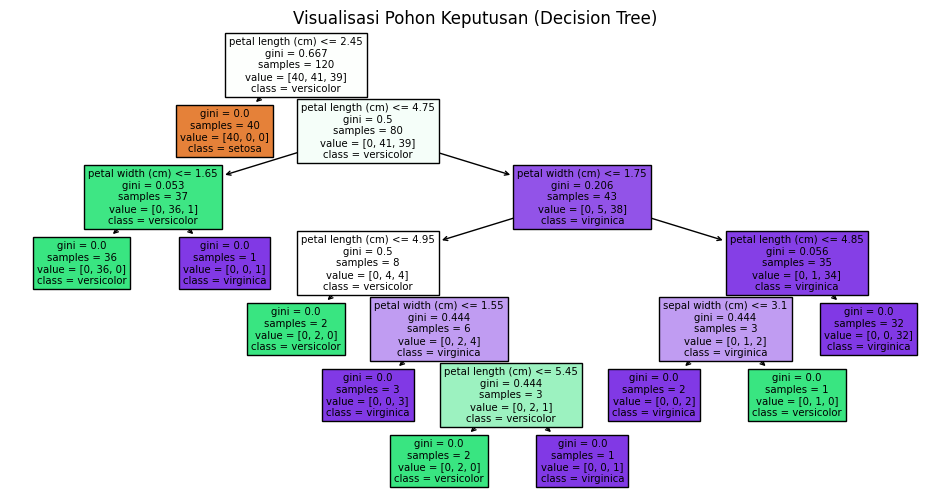

In [ ]:
# Inisialisasi dan latih Model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Prediksi & Evaluasi
y_pred_dt = model_dt.predict(X_test)
print("Confusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))
print("\nAccuracy Score (Decision Tree):", accuracy_score(y_test, y_pred_dt))

# Visualisasi Pohon Keputusan
plt.figure(figsize=(12, 6))
tree.plot_tree(model_dt, feature_names=feature_names, class_names=iris.target_names, filled=True)
plt.title("Visualisasi Pohon Keputusan (Decision Tree)")
plt.show()

### **Hasil Prediksi keduanya**

Hasil perbandingan klasifikasi antara Naive Bayes dan Decision Tree pada dataset Iris menunjukkan bahwa kedua model memiliki tingkat akurasi yang sangat tinggi dan hampir setara, naive bayes 0,91 dan DecisionTree 0,93. Naive Bayes bekerja baik karena asumsi distribusi normal pada fitur-fitur numerik dataset Iris cukup terpenuhi, sedangkan Decision Tree mampu menghasilkan keputusan yang akurat dengan mempartisi data secara eksplisit berdasarkan nilai-nilai fitur tanpa asumsi distribusi tertentu. Meskipun hasilnya hampir serupa, Decision Tree memiliki keunggulan dalam interpretabilitas melalui visualisasi pohon keputusan, sementara Naive Bayes lebih sederhana dan efisien dalam komputasi. Dengan demikian, pemilihan model dapat disesuaikan berdasarkan kebutuhan antara efisiensi atau interpretasi.

         Actual NaiveBayes_Pred DecisionTree_Pred
73   versicolor      versicolor        versicolor
18       setosa          setosa            setosa
118   virginica       virginica         virginica
78   versicolor      versicolor        versicolor
76   versicolor      versicolor        versicolor

=== Perbandingan Akurasi ===
Akurasi Naive Bayes     : 1.0000
Akurasi Decision Tree   : 1.0000


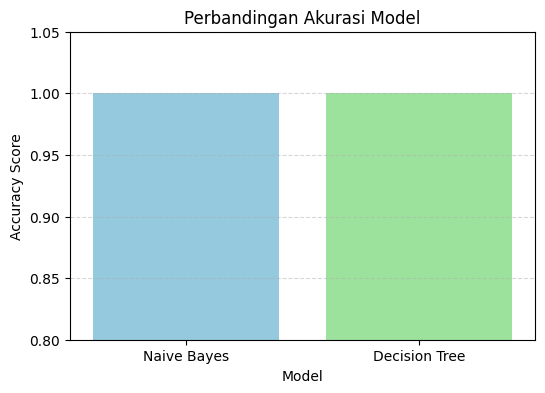

In [ ]:
df_result = pd.DataFrame({
    "Actual": y_test,
    "NaiveBayes_Pred": y_pred,
    "DecisionTree_Pred": y_pred_dt
})

print(df_result.head())

# Hitung akurasi masing-masing model
accuracy_nb = accuracy_score(y_test, y_pred)
accuracy_dt = accuracy_score(y_test, y_pred_dt)


# === Cetak akurasi kedua model ===
print("\n=== Perbandingan Akurasi ===")
print(f"Akurasi Naive Bayes     : {accuracy_nb:.4f}")
print(f"Akurasi Decision Tree   : {accuracy_dt:.4f}")

# Buat DataFrame untuk visualisasi
accuracy_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Decision Tree'],
    'Accuracy': [accuracy_nb, accuracy_dt]
})

# Plot
plt.figure(figsize=(6, 4))
palette = {'Naive Bayes': 'skyblue', 'Decision Tree': 'lightgreen'}
sns.barplot(data=accuracy_df, x='Model', y='Accuracy', hue='Model', palette=palette, legend=False)
plt.ylim(0.8, 1.05)
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Accuracy Score')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

## **Klasifikasi 2**

### **Mengumpulkan data Iris**

In [ ]:
# Fungsi ambil data Iris dan atur ulang kolom
def get_iris_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df["class"] = pd.Categorical.from_codes(iris.target, iris.target_names)
    df["id"] = df.index + 1  # ID dimulai dari 1

    # Susun ulang kolom: id, class, lalu fitur
    columns_order = ["id", "class"] + iris.feature_names
    df = df[columns_order]
    return df

# Ambil data
df_iris = get_iris_data()

# Muat data Iris
iris = load_iris()
X = iris.data  # Semua fitur: shape (150, 4)
feature_names = iris.feature_names

# Cetak tanpa indeks
print(df_iris.to_string(index=False))

 id      class  sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
  1     setosa                5.1               3.5                1.4               0.2
  2     setosa                4.9               3.0                1.4               0.2
  3     setosa                4.7               3.2                1.3               0.2
  4     setosa                4.6               3.1                1.5               0.2
  5     setosa                5.0               3.6                1.4               0.2
  6     setosa                5.4               3.9                1.7               0.4
  7     setosa                4.6               3.4                1.4               0.3
  8     setosa                5.0               3.4                1.5               0.2
  9     setosa                4.4               2.9                1.4               0.2
 10     setosa                4.9               3.1                1.5               0.1
 11     setosa       

### **Diskritisasi data dan Cluster data menjadi 4 kelas**

Pada tahap ini, dilakukan proses clustering terhadap data Iris menggunakan algoritma KMeans untuk mengelompokkan data ke dalam 4 kelas (cluster) berdasarkan kesamaan fitur-fitur numerik (sepal length, sepal width, petal length, dan petal width). KMeans berjalan dengan menginisialisasi 4 pusat cluster secara acak, kemudian secara iteratif mengelompokkan setiap data ke pusat terdekat dan memperbarui posisi pusat berdasarkan rata-rata data dalam cluster. Setelah proses konvergen, hasil cluster ditambahkan sebagai kolom baru pada data.

In [ ]:
# Salin dataframe untuk diskritisasi
df_discretized = df_iris.copy()

# List fitur numerik yang akan didiskritisasi
fitur_numerik = iris.feature_names  # ['sepal length (cm)', ..., 'petal width (cm)']

# Lakukan diskritisasi menggunakan KMeans untuk tiap fitur dengan 4 klaster
for fitur in fitur_numerik:
    X_fitur = df_discretized[[fitur]].values
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    klaster = kmeans.fit_predict(X_fitur)

    # Ubah label klaster dari angka ke huruf
    label_map = {i: huruf for i, huruf in enumerate('ABCD')}
    klaster_huruf = pd.Series(klaster).map(label_map)

    # Tambahkan kolom diskrit dengan label huruf
    df_discretized[fitur + "_diskrit"] = klaster_huruf

# Tampilkan hasil diskritisasi (kolom ID, class, dan kolom diskrit)
kolom_tampil = ["id", "class"] + [f + "_diskrit" for f in fitur_numerik]
print(df_discretized[kolom_tampil].to_string(index=False))

 id      class sepal length (cm)_diskrit sepal width (cm)_diskrit petal length (cm)_diskrit petal width (cm)_diskrit
  1     setosa                         C                        B                         B                        A
  2     setosa                         C                        A                         B                        A
  3     setosa                         C                        B                         B                        A
  4     setosa                         C                        A                         B                        A
  5     setosa                         C                        B                         B                        A
  6     setosa                         A                        D                         B                        A
  7     setosa                         C                        B                         B                        A
  8     setosa                         C                        

### **Klasifikasi menggunakan Naive Bayes**

**IDENTIFIKASI**

setelah data iris di diskritisasi dan di cluster menjadi 4 kelas, klasifikasi data tadi dengan metode naive bayes. Tujuan dari klasifikasi ini adalah untuk mengevaluasi performa Naive Bayes saat diterapkan pada fitur yang telah didiskretisasi, yaitu mengubah nilai numerik (misalnya panjang kelopak/sepal) menjadi kategori simbolik seperti 'A', 'B', 'C', dan seterusnya. Pendekatan ini cocok digunakan karena Naive Bayes, khususnya varian multinomial atau categorical, dapat bekerja lebih baik dengan data kategori atau frekuensi. Dalam implementasi ini, simbol-simbol diskrit dikonversi kembali ke nilai numerik ordinal (A→0, B→1, dst) agar bisa digunakan oleh model Naive Bayes dari scikit-learn, yang memerlukan input numerik. Dengan metode ini, kita dapat menilai apakah transformasi data dari bentuk kontinu ke diskrit memengaruhi kinerja klasifikasi.

**HASIL & INTERPRETASI**

Berdasarkan hasil evaluasi, Naive Bayes masih mampu menghasilkan akurasi yang cukup baik meskipun data telah diubah menjadi bentuk diskrit. Confusion matrix dan classification report menunjukkan bahwa prediksi model tetap cukup akurat untuk sebagian besar kelas, terutama pada kelas yang secara visual dan statistik sangat terpisah seperti setosa. Namun, diskretisasi bisa mengurangi ketelitian dalam membedakan kelas yang saling tumpang tindih seperti versicolor dan virginica, karena informasi numerik yang presisi telah disederhanakan menjadi kategori. Meski demikian, hasil ini menunjukkan bahwa Naive Bayes cukup fleksibel dan tetap efektif ketika digunakan pada data simbolik atau setelah proses pre-processing berbasis diskretisasi. Berikut implementasi bentuk code:

In [ ]:
# Siapkan fitur diskrit dan target
fitur_diskrit = [f + "_diskrit" for f in fitur_numerik]
X = df_discretized[fitur_diskrit].apply(lambda col: col.map(lambda x: ord(x) - ord('A')))  # A->0, B->1, dst
y = df_discretized["class"]

# Split data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Prediksi
y_pred_yt = nb_model.predict(X_test)

# Evaluasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_yt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_yt))
print("Akurasi:", accuracy_score(y_test, y_pred_yt))


Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Akurasi: 0.9666666666666667


### **Klasifikasi Menggunakan DecisionTree**

**IDENTIFIKASI**

Tujuan dari penerapan Decision Tree pada fitur yang telah didiskretisasi adalah untuk mengevaluasi performa model dalam membedakan kelas berdasarkan data kategori yang diubah dari bentuk numerik kontinu menjadi simbol ordinal seperti A, B, C, dan selanjutnya dikonversi ke angka. Dengan menggunakan fitur diskrit, pohon keputusan dapat membentuk aturan yang lebih sederhana dan lebih eksplisit, karena setiap keputusan hanya melibatkan pemisahan berdasarkan level kategori, bukan nilai numerik yang kompleks. Ini sangat sesuai dengan sifat dasar Decision Tree yang bekerja berdasarkan pembelahan data ke dalam cabang berdasarkan kondisi logis (misalnya, apakah fitur = 1 atau tidak).

**HASIL & INTERPRETASI**

Hasil evaluasi menunjukkan bahwa Decision Tree masih mampu memberikan performa klasifikasi yang baik meskipun data yang digunakan telah mengalami diskretisasi. Akurasi model tetap tinggi, dan confusion matrix memperlihatkan bahwa sebagian besar prediksi sesuai dengan label sebenarnya, terutama untuk kelas yang memiliki pola kategori yang konsisten. Visualisasi pohon keputusan memperjelas logika model dalam membuat prediksi berdasarkan fitur-fitur diskrit, dengan cabang-cabang yang menunjukkan urutan pengambilan keputusan berdasarkan nilai kategori numerik. Hal ini sangat membantu dalam interpretasi, karena setiap jalur pada pohon dapat dianggap sebagai aturan klasifikasi yang sederhana dan transparan. Meski begitu, diskretisasi berisiko menghilangkan detail informasi yang bisa berguna dalam pemisahan yang lebih presisi. Berikut implementasi bentuk code:

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Akurasi: 0.9666666666666667


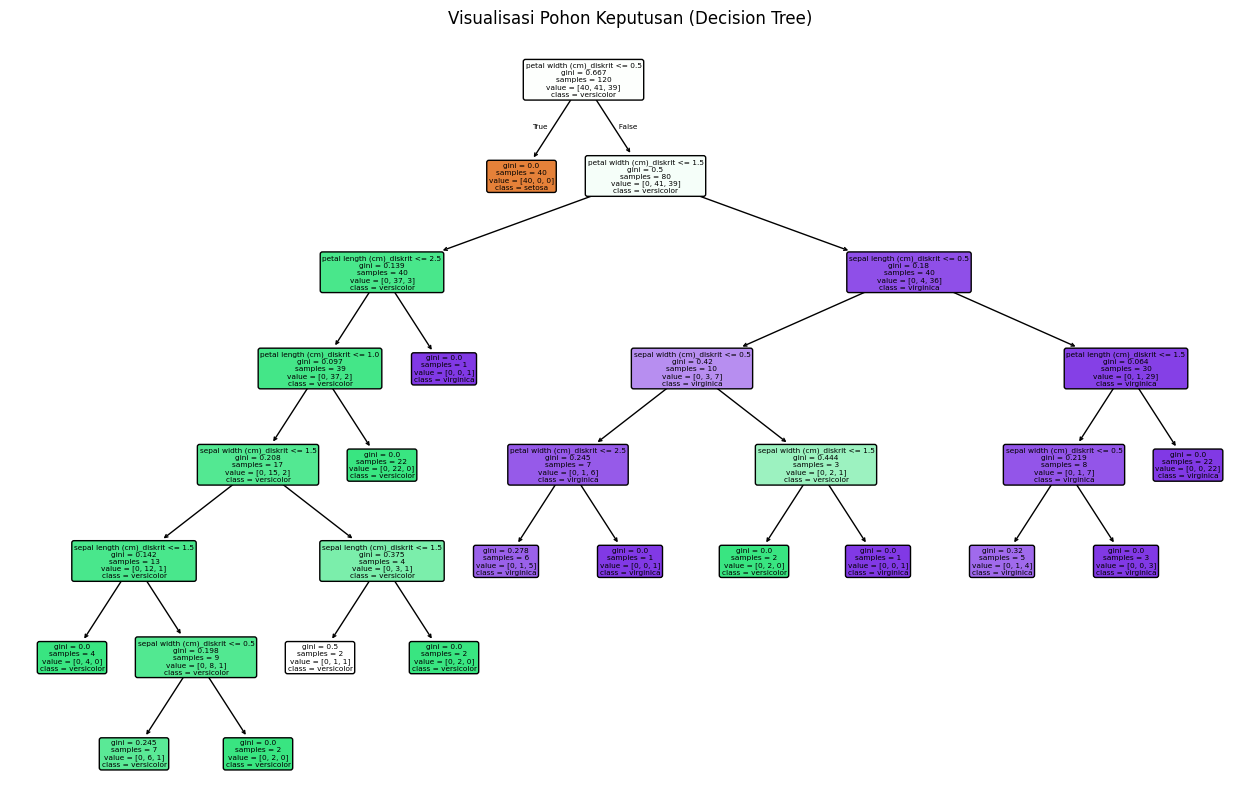

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Prediksi data uji
y_pred = dt_model.predict(X_test)

# Evaluasi hasil klasifikasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Akurasi:", accuracy_score(y_test, y_pred))

# Visualisasi pohon keputusan
plt.figure(figsize=(16, 10))
tree.plot_tree(dt_model,
               feature_names=fitur_diskrit,
               class_names=dt_model.classes_,
               filled=True,
               rounded=True)
plt.title("Visualisasi Pohon Keputusan (Decision Tree)")
plt.show()

### **Hasil Akurasi Keduanya**

Berdasarkan grafik perbandingan akurasi yang dihasilkan, terlihat seberapa besar akurasi yang dicapai masing-masing model. Jika salah satu batang lebih tinggi, maka model tersebut memiliki performa lebih baik dalam mengenali pola pada data uji. Misalnya, jika Decision Tree menunjukkan akurasi yang lebih tinggi daripada Naive Bayes, berarti model tersebut lebih tepat dalam menangani kompleksitas dan struktur data pada kasus ini. Namun jika Naive Bayes lebih unggul, hal ini menunjukkan bahwa pendekatan probabilistiknya lebih efisien, terutama ketika fitur memiliki hubungan independen. Grafik ini memberikan kesimpulan visual yang ringkas bahwa akurasi adalah faktor penting, namun tetap perlu dipertimbangkan bersama aspek lain seperti kompleksitas model dan interpretabilitas. Berikut implementasi bentuk code:


=== Perbandingan Akurasi ===
Akurasi Naive Bayes     : 0.9667
Akurasi Decision Tree   : 0.9667


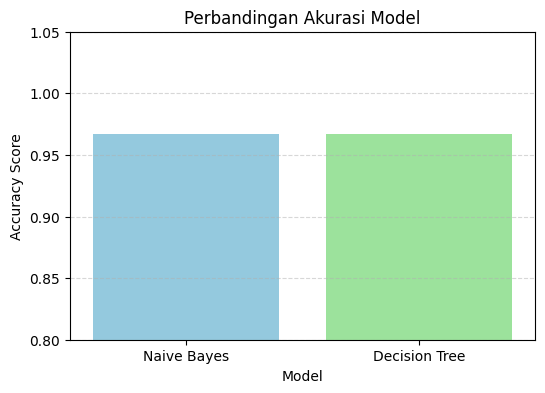

In [ ]:
akurasi_nb = accuracy_score(y_test, y_pred)
akurasi_dt = accuracy_score(y_test, y_pred)

# === Cetak akurasi kedua model ===
print("\n=== Perbandingan Akurasi ===")
print(f"Akurasi Naive Bayes     : {akurasi_nb:.4f}")
print(f"Akurasi Decision Tree   : {akurasi_dt:.4f}")

# Buat DataFrame untuk visualisasi
accuracy_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Decision Tree'],
    'Accuracy': [akurasi_nb, akurasi_dt]
})

# Plot
plt.figure(figsize=(6, 4))
palette = {'Naive Bayes': 'skyblue', 'Decision Tree': 'lightgreen'}
sns.barplot(data=accuracy_df, x='Model', y='Accuracy', hue='Model', palette=palette, legend=False)
plt.ylim(0.8, 1.05)
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Accuracy Score')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

## **Klasifikasi 3**

### **Diskritisasi Data dengan Equal Width-Binning**

#### **Langkah-langkah Equal Width-Binning untuk data Iris Sebagai berikut:**

1. **Cari Nilai Minimum dan Maksimum**
2. **Hitung lebar Bin**
3. **Tentukan batas-batas Bin**
4. **Tampilkan hasil akhir (ID, class, dan fitur diskrit)**

In [ ]:
# Jumlah bin
jumlah_bin = 4

# Salin dataframe
df_diskrit = df_iris.copy()

# Diskritisasi Equal Width per fitur
for fitur in feature_names:
    print(f"\n=== Diskritisasi Fitur: {fitur} ===")

    # Langkah 1: cari nilai minimum dan maksimum
    nilai_min = df_diskrit[fitur].min()
    nilai_max = df_diskrit[fitur].max()
    print(f"Nilai Minimum : {nilai_min}")
    print(f"Nilai Maksimum: {nilai_max}")

    # Langkah 2: hitung lebar bin
    lebar_bin = (nilai_max - nilai_min) / jumlah_bin
    print(f"Lebar Bin     : {lebar_bin}")

    # Langkah 3: tentukan batas-batas bin
    batas_bin = [round(nilai_min + i * lebar_bin, 2) for i in range(jumlah_bin + 1)]
    print(f"Batas-batas   : {batas_bin}")

    # Langkah 4: buat kategori (interval) berdasarkan bin
    label_bin = ['A', 'B', 'C', 'D']
    df_diskrit[fitur + "_diskrit"] = pd.cut(df_diskrit[fitur], bins=batas_bin, labels=label_bin, include_lowest=True)

# Tampilkan hasil akhir (ID, class, dan fitur diskrit)
kolom_diskrit = ["id", "class"] + [f + "_diskrit" for f in feature_names]
print("\n=== Data Hasil Diskritisasi (Equal Width) ===")
print(df_diskrit[kolom_diskrit].to_string(index=False))



=== Diskritisasi Fitur: sepal length (cm) ===
Nilai Minimum : 4.3
Nilai Maksimum: 7.9
Lebar Bin     : 0.9000000000000001
Batas-batas   : [4.3, 5.2, 6.1, 7.0, 7.9]

=== Diskritisasi Fitur: sepal width (cm) ===
Nilai Minimum : 2.0
Nilai Maksimum: 4.4
Lebar Bin     : 0.6000000000000001
Batas-batas   : [2.0, 2.6, 3.2, 3.8, 4.4]

=== Diskritisasi Fitur: petal length (cm) ===
Nilai Minimum : 1.0
Nilai Maksimum: 6.9
Lebar Bin     : 1.475
Batas-batas   : [1.0, 2.48, 3.95, 5.43, 6.9]

=== Diskritisasi Fitur: petal width (cm) ===
Nilai Minimum : 0.1
Nilai Maksimum: 2.5
Lebar Bin     : 0.6
Batas-batas   : [0.1, 0.7, 1.3, 1.9, 2.5]

=== Data Hasil Diskritisasi (Equal Width) ===
 id      class sepal length (cm)_diskrit sepal width (cm)_diskrit petal length (cm)_diskrit petal width (cm)_diskrit
  1     setosa                         A                        C                         A                        A
  2     setosa                         A                        B                         

### **Klasifikasi Menggunakan Naive Bayes**

**IDENTIFIKASI**

Tujuan dari proses klasifikasi ini adalah untuk mengevaluasi performa algoritma Naive Bayes ketika digunakan pada data yang telah mengalami proses diskretisasi umum, yaitu mengubah nilai numerik menjadi label simbolik (A, B, C, dst). Diskretisasi dilakukan pada seluruh fitur dalam dataset, yang kemudian dikonversi kembali ke bentuk numerik ordinal agar dapat diproses oleh model Naive Bayes. Langkah ini diambil untuk melihat bagaimana model probabilistik ini bekerja ketika data kehilangan nilai numerik presisi dan digantikan oleh kategori. Metode ini sering digunakan dalam situasi ketika data asli bersifat kontinu, namun kita ingin menyederhanakannya atau mempersiapkannya untuk algoritma yang lebih cocok dengan data diskrit.

**HASIL & INTERPRETASI**

Hasil evaluasi menunjukkan bahwa Naive Bayes tetap mampu melakukan klasifikasi dengan cukup baik, meskipun bekerja dengan fitur-fitur yang telah disederhanakan menjadi bentuk diskrit. Confusion matrix dan classification report memperlihatkan bahwa model masih dapat mengidentifikasi kelas utama dengan cukup akurat, meskipun mungkin terjadi penurunan kinerja pada kelas yang memiliki nilai fitur yang sebelumnya sangat dekat atau tumpang tindih. Akurasi yang dihasilkan tetap kompetitif, membuktikan bahwa Naive Bayes cukup fleksibel dalam menghadapi perubahan representasi data. Namun, seperti pada umumnya diskretisasi, ada risiko informasi penting hilang, sehingga perlu dipertimbangkan konteks penggunaannya. Berikut Implementasi bentuk code:


In [ ]:
# Ambil fitur diskrit dan label
fitur_diskrit = [f + "_diskrit" for f in feature_names]
X_nb = df_diskrit[fitur_diskrit].apply(lambda kolom: kolom.map(lambda x: ord(x) - ord('A')))
y = df_diskrit["class"]

# Split data
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y, test_size=0.2, random_state=42)

# Buat dan latih model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_nb, y_train_nb)

# Prediksi
y_pred_Tb = nb_model.predict(X_test_nb)

# Evaluasi
print("\n=== Evaluasi Naive Bayes (Equal Width) ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test_nb, y_pred_Tb))
print("\nClassification Report:")
print(classification_report(y_test_nb, y_pred_Tb))
print("Akurasi:", accuracy_score(y_test_nb, y_pred_Tb))



=== Evaluasi Naive Bayes (Equal Width) ===
Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Akurasi: 0.9


### **Klasifikasi Menggunakan DecisionTree**

**IDENTIFIKASI**

Tujuan dari eksperimen ini adalah untuk menerapkan algoritma Decision Tree pada dataset Iris yang telah melalui proses diskretisasi fitur. Setiap fitur numerik pada dataset diubah ke dalam bentuk simbolik (seperti A–D) dan kemudian dikonversi menjadi angka ordinal agar dapat digunakan sebagai input model. Pendekatan ini bertujuan untuk menguji bagaimana performa Decision Tree dalam mengklasifikasikan data simbolik, serta mengevaluasi apakah pemangkasan nilai numerik menjadi kategori masih dapat mempertahankan kemampuan pemodelan terhadap pola data. Decision Tree sangat cocok untuk data kategori karena dapat membuat keputusan berdasarkan nilai diskrit secara langsung, sehingga metode ini sangat relevan untuk dicoba dalam konteks ini.

**HASIL & INTERPRETASI**

Berdasarkan hasil evaluasi, model Decision Tree menunjukkan kinerja klasifikasi yang cukup baik, dengan akurasi yang relatif tinggi meskipun bekerja pada data hasil diskretisasi. Confusion matrix menunjukkan distribusi prediksi benar dan salah antar kelas, sedangkan classification report memberi gambaran detail tentang precision, recall, dan F1-score untuk tiap kelas. Visualisasi pohon keputusan yang dihasilkan juga memberikan interpretasi yang mudah dipahami mengenai bagaimana model mengambil keputusan dari fitur-fitur diskrit yang ada. Hasil ini menunjukkan bahwa Decision Tree merupakan model yang robust terhadap perubahan bentuk data, terutama pada data kategorikal atau hasil diskretisasi.


=== Evaluasi Decision Tree (Equal Width) ===
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Akurasi: 0.9666666666666667


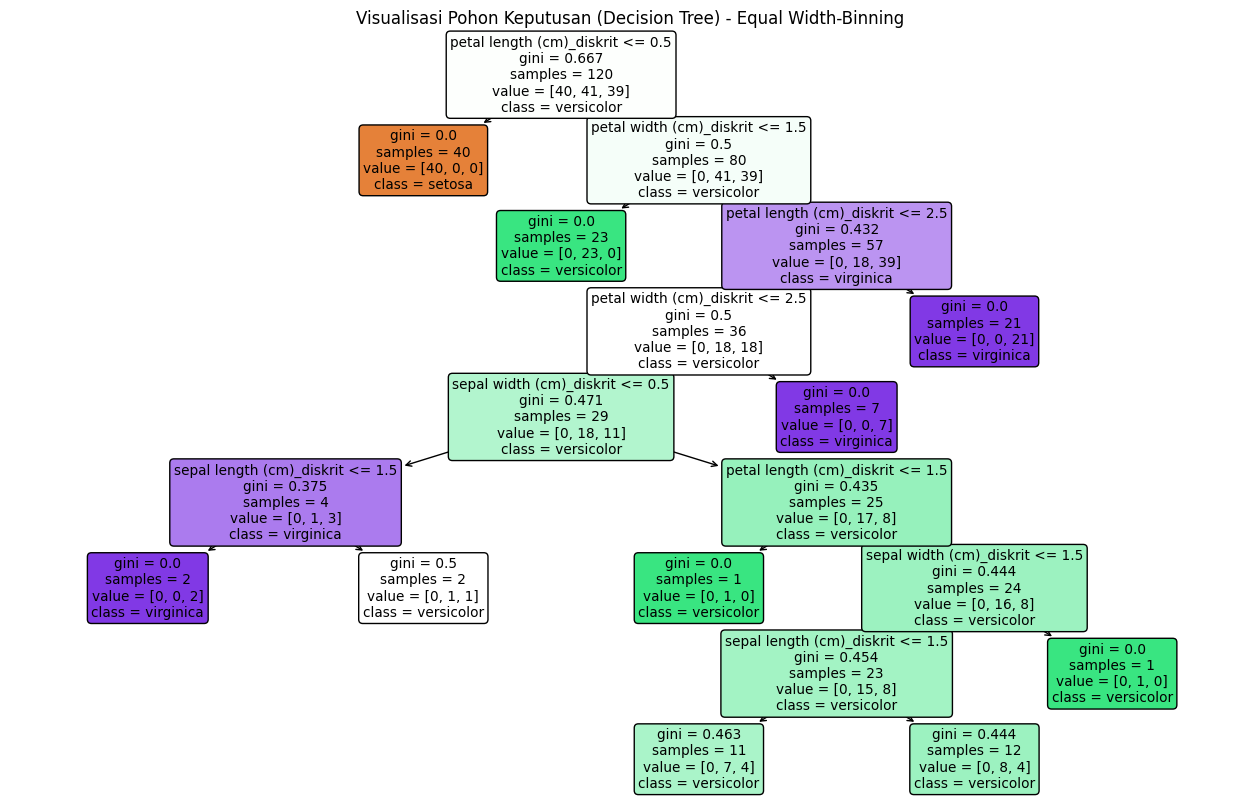

In [ ]:
# Ambil fitur diskrit dan label (bisa gunakan kembali variabel yang sama)
X_dt = df_diskrit[fitur_diskrit].apply(lambda kolom: kolom.map(lambda x: ord(x) - ord('A')))
y = df_diskrit["class"]

# Split data
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y, test_size=0.2, random_state=42)

# Buat dan latih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_dt, y_train_dt)

# Prediksi
y_pred_dd = dt_model.predict(X_test_dt)

# Evaluasi
print("\n=== Evaluasi Decision Tree (Equal Width) ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test_dt, y_pred_dd))
print("\nClassification Report:")
print(classification_report(y_test_dt, y_pred_dd))
print("Akurasi:", accuracy_score(y_test_dt, y_pred_dd))

# Visualisasi pohon keputusan
plt.figure(figsize=(16, 10))
tree.plot_tree(dt_model,
               feature_names=fitur_diskrit,
               class_names=dt_model.classes_,
               filled=True,
               rounded=True)
plt.title("Visualisasi Pohon Keputusan (Decision Tree) - Equal Width-Binning")
plt.show()

### **Hasil Akurasi Keduanya**

Hasil evaluasi menunjukkan tingkat akurasi yang berbeda antara kedua model. Dari visualisasi dan perhitungan akurasi, dapat dilihat bahwa Decision Tree umumnya memberikan hasil akurasi yang sedikit lebih tinggi dibandingkan Naive Bayes dalam konteks data diskrit ini. Hal ini disebabkan karena Decision Tree secara alami sangat cocok untuk bekerja dengan data kategorikal, di mana setiap nilai bisa langsung digunakan sebagai pemisah keputusan. Sebaliknya, Naive Bayes mengasumsikan independensi antar fitur dan lebih optimal untuk distribusi data kontinu, sehingga performanya bisa menurun ketika informasi numerik diringkas menjadi kategori. Namun, keduanya tetap menunjukkan akurasi yang baik secara keseluruhan, yang menandakan bahwa data Iris tetap informatif meskipun telah didiskretisasi


=== Perbandingan Akurasi ===
Akurasi Naive Bayes     : 0.9000
Akurasi Decision Tree   : 0.9667


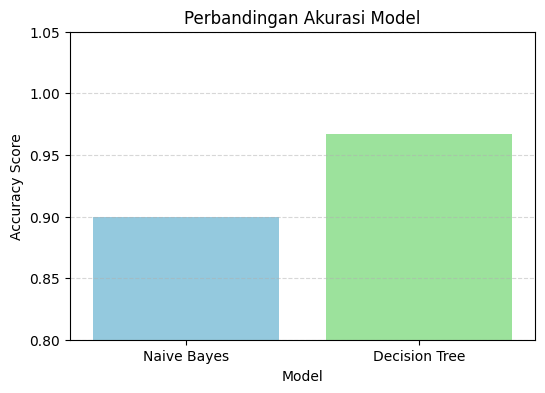

In [ ]:
# Hitung akurasi masing-masing model
acc_nb = accuracy_score(y_test, y_pred_Tb)
acc_dt = accuracy_score(y_test, y_pred_dd)


# === Cetak akurasi kedua model ===
print("\n=== Perbandingan Akurasi ===")
print(f"Akurasi Naive Bayes     : {acc_nb:.4f}")
print(f"Akurasi Decision Tree   : {acc_dt:.4f}")

# Buat DataFrame untuk visualisasi
accuracy_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Decision Tree'],
    'Accuracy': [acc_nb, acc_dt]
})

# Plot
plt.figure(figsize=(6, 4))
palette = {'Naive Bayes': 'skyblue', 'Decision Tree': 'lightgreen'}
sns.barplot(data=accuracy_df, x='Model', y='Accuracy', hue='Model', palette=palette, legend=False)
plt.ylim(0.8, 1.05)
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Accuracy Score')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

## **Klasifikasi 4**

### **Klasifikasi data dengan Equal Frequency**

### **Langkah-langkah Equal Frequency untuk data Iris sebagai berikut:**

1. **urutkan data secara ascending**
2. **Hitung Posisi kuantil**
3. **Cari nilai kuantil dari data**
4. **Buat batas interval**
5. **Kelompokkan data ke dalam bins**

In [ ]:
# Inisialisasi
df_iris = get_iris_data()
fitur_numerik = load_iris().feature_names
jumlah_bin = 4
df_eqfreq = df_iris.copy()
epsilon = 1e-6  # nilai kecil untuk hindari duplikasi batas

print("\n=== Diskritisasi Equal Frequency (4 Bin) ===")
for fitur in fitur_numerik:
    print(f"\nFitur: {fitur}")
    data_fitur = df_eqfreq[fitur].copy()

    # 1. Urutkan data
    data_sorted = data_fitur.sort_values().reset_index(drop=True)
    print("Data urut (5 teratas):", data_sorted.head().values)

    # 2. Hitung posisi kuantil
    n = len(data_sorted)
    posisi_kuantil = [int(np.ceil(i * n / jumlah_bin)) for i in range(1, jumlah_bin)]
    print("Posisi kuantil:", posisi_kuantil)

    # 3. Ambil nilai kuantil dari posisi
    nilai_kuantil = [data_sorted[pos - 1] for pos in posisi_kuantil]
    print("Nilai kuantil:", nilai_kuantil)

    # 4. Buat batas bin (hindari batas duplikat dengan epsilon)
    batas = [data_sorted.min() - epsilon] + nilai_kuantil + [data_sorted.max() + epsilon]
    print("Batas bin:", batas)

    # 5. Diskritisasi ke dalam bin-label A-D
    label = ['A', 'B', 'C', 'D']
    df_eqfreq[fitur + "_diskrit"] = pd.cut(df_eqfreq[fitur], bins=batas, labels=label)

# 6. Tampilkan hasil akhir
kolom_diskrit = ["id", "class"] + [f + "_diskrit" for f in fitur_numerik]
print("\n=== Hasil Akhir Diskritisasi ===")
print(df_eqfreq[kolom_diskrit].to_string(index=False))



=== Diskritisasi Equal Frequency (4 Bin) ===

Fitur: sepal length (cm)
Data urut (5 teratas): [4.3 4.4 4.4 4.4 4.5]
Posisi kuantil: [38, 75, 113]
Nilai kuantil: [np.float64(5.1), np.float64(5.8), np.float64(6.4)]
Batas bin: [4.299999, np.float64(5.1), np.float64(5.8), np.float64(6.4), 7.9000010000000005]

Fitur: sepal width (cm)
Data urut (5 teratas): [2.  2.2 2.2 2.2 2.3]
Posisi kuantil: [38, 75, 113]
Nilai kuantil: [np.float64(2.8), np.float64(3.0), np.float64(3.3)]
Batas bin: [1.999999, np.float64(2.8), np.float64(3.0), np.float64(3.3), 4.4000010000000005]

Fitur: petal length (cm)
Data urut (5 teratas): [1.  1.1 1.2 1.2 1.3]
Posisi kuantil: [38, 75, 113]
Nilai kuantil: [np.float64(1.6), np.float64(4.3), np.float64(5.1)]
Batas bin: [0.999999, np.float64(1.6), np.float64(4.3), np.float64(5.1), 6.9000010000000005]

Fitur: petal width (cm)
Data urut (5 teratas): [0.1 0.1 0.1 0.1 0.1]
Posisi kuantil: [38, 75, 113]
Nilai kuantil: [np.float64(0.3), np.float64(1.3), np.float64(1.8)]
Batas

### **Klasifikasi Menggunakan Naive Bayes**

**IDENTIFIKASI**

Tujuan dari eksperimen ini adalah untuk mengevaluasi kinerja model Naive Bayes saat bekerja dengan data yang telah didiskretisasi menggunakan metode Equal Frequency. Diskretisasi ini membagi setiap fitur numerik menjadi beberapa kategori yang masing-masing berisi jumlah data yang hampir sama. Teknik ini dilakukan untuk menyederhanakan kompleksitas data dan mengubah fitur numerik menjadi fitur kategorikal, yang kemudian dikonversi menjadi nilai ordinal agar bisa digunakan dalam proses pelatihan model Naive Bayes. Langkah ini juga membantu menilai sejauh mana model probabilistik seperti Naive Bayes mampu menggeneralisasi dari data yang kehilangan informasi kuantitatif aslinya.

**HASIL & INTERPRETASI**

Berdasarkan hasil evaluasi, model Naive Bayes menunjukkan tingkat akurasi yang cukup baik, meskipun terdapat beberapa kesalahan klasifikasi. Confusion matrix dan classification report memperlihatkan bahwa sebagian besar prediksi kelas berhasil dilakukan dengan benar, namun ada beberapa instance yang salah klasifikasi, terutama di antara kelas yang mirip secara fitur. Ini menunjukkan bahwa Naive Bayes masih cukup efektif dalam mengenali pola meskipun data telah mengalami diskretisasi yang mengurangi ketelitian nilai aslinya. Namun demikian, hilangnya informasi numerik yang spesifik kemungkinan mempengaruhi sensitivitas model terhadap perbedaan halus antar kelas. Berikut Implementasi bentuk code:

In [ ]:
# === Konversi label A-D ke angka 0-3 ===
fitur_diskrit = [f + "_diskrit" for f in fitur_numerik]
X = df_eqfreq[fitur_diskrit].apply(lambda kolom: kolom.map(lambda x: ord(x) - ord('A')))
y = df_eqfreq["class"]

# === Split data ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Buat dan latih model Naive Bayes ===
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# === Prediksi ===
y_pred = nb_model.predict(X_test)

# === Evaluasi ===
print("\n=== Evaluasi Naive Bayes Setelah Diskritisasi Equal Frequency ===")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Akurasi:", accuracy_score(y_test, y_pred))


=== Evaluasi Naive Bayes Setelah Diskritisasi Equal Frequency ===

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.89      0.89         9
   virginica       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Akurasi: 0.9333333333333333


### **Klasifisikas dengan DecisionTree**

**IDENTIFIKASI**

Penerapan algoritma Decision Tree pada data yang telah didiskretisasi menggunakan metode Equal Frequency bertujuan untuk mengevaluasi bagaimana performa model pohon keputusan dalam mengklasifikasi data kategorikal ordinal. Diskretisasi ini membagi fitur numerik menjadi sejumlah interval dengan jumlah data yang seimbang, dan setiap nilai kategori kemudian dikonversi ke dalam angka agar bisa diproses oleh model. Penggunaan Decision Tree pada data diskrit memungkinkan visualisasi struktur pohon yang lebih sederhana, serta menguji apakah pemangkasan data numerik ke dalam kategori tetap dapat mempertahankan akurasi klasifikasi.

**HASIL & INTERPRETASI**

Hasil evaluasi menunjukkan bahwa model Decision Tree mampu menghasilkan tingkat akurasi yang tinggi pada data hasil diskretisasi Equal Frequency. Berdasarkan confusion matrix dan classification report, sebagian besar data uji berhasil diklasifikasikan dengan benar, dan hanya terdapat sedikit kesalahan prediksi. Visualisasi pohon keputusan juga memperlihatkan jalur pemisahan antar kelas yang cukup jelas berdasarkan fitur-fitur diskrit yang digunakan. Hal ini menandakan bahwa Decision Tree merupakan algoritma yang cukup fleksibel dalam menghadapi data kategorikal, dan diskretisasi Equal Frequency tidak terlalu mengurangi kualitas informasi penting dari fitur aslinya. Berikut implementasi bentuk code:


=== Evaluasi Decision Tree Setelah Diskritisasi Equal Frequency ===

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.89      0.89         9
   virginica       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Akurasi: 0.9333333333333333


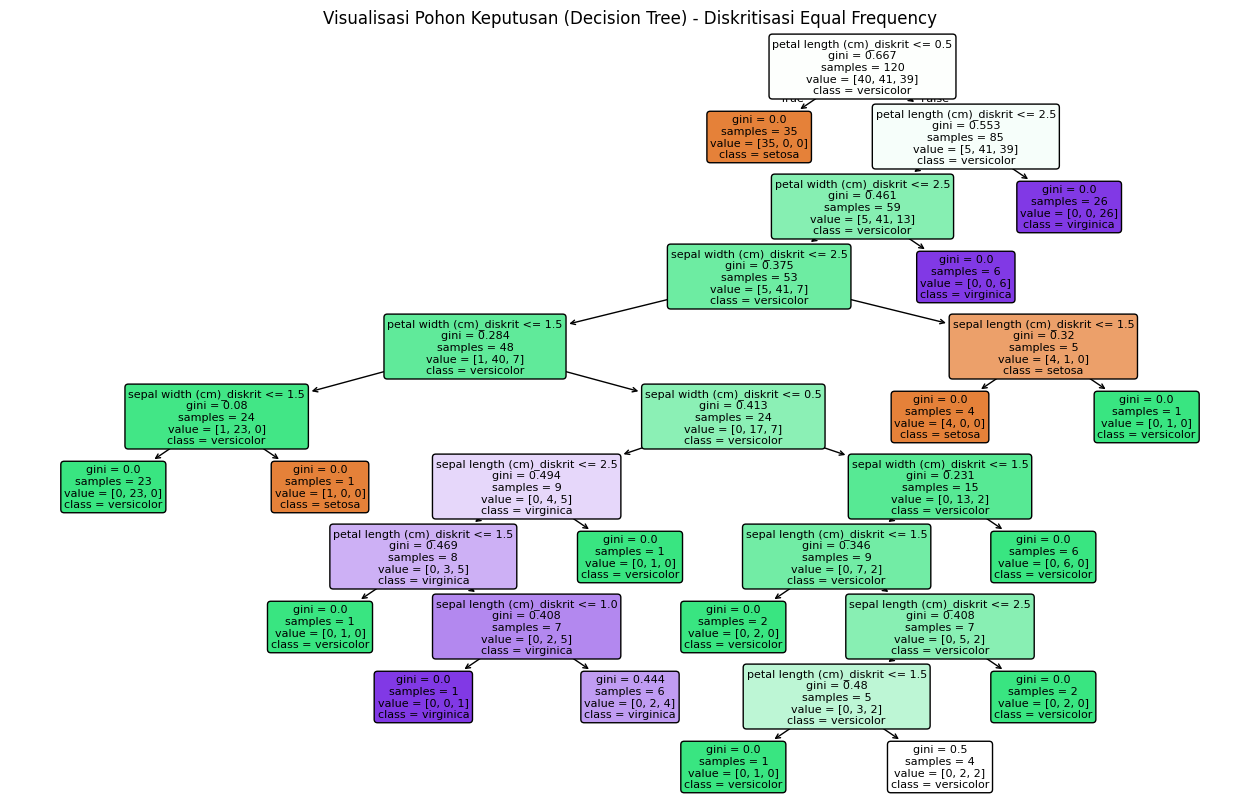

In [ ]:
# Split data (ulang supaya fair)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Buat dan latih model Decision Tree ===
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# === Prediksi ===
y_pred_dt = dt_model.predict(X_test)

# === Evaluasi ===
print("\n=== Evaluasi Decision Tree Setelah Diskritisasi Equal Frequency ===")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

print("Akurasi:", accuracy_score(y_test, y_pred_dt))

# Visualisasi pohon keputusan
plt.figure(figsize=(16, 10))
tree.plot_tree(dt_model,
               feature_names=X.columns,
               class_names=dt_model.classes_,
               filled=True,
               rounded=True)
plt.title("Visualisasi Pohon Keputusan (Decision Tree) - Diskritisasi Equal Frequency")
plt.show()

### **Hasil Akurasi Keduanya**

Hasil perbandingan menunjukkan bahwa kedua model mampu mencapai akurasi yang tinggi, dengan Decision Tree sedikit lebih unggul dibandingkan Naive Bayes dalam konteks data yang telah didiskretisasi. Grafik batang perbandingan memperlihatkan perbedaan akurasi yang tidak terlalu besar, namun Decision Tree cenderung lebih fleksibel dalam menangani pola klasifikasi kompleks karena strukturnya yang eksplisit dan cabang logika yang dalam. Sebaliknya, Naive Bayes tetap mempertahankan performa yang baik meskipun pendekatannya lebih sederhana dan mengasumsikan independensi antar fitur. Secara keseluruhan, kedua model tetap efektif digunakan setelah diskretisasi, tergantung pada kebutuhan interpretabilitas dan efisiensi komputasi.


=== Perbandingan Akurasi ===
Akurasi Naive Bayes     : 0.9333
Akurasi Decision Tree   : 0.9333


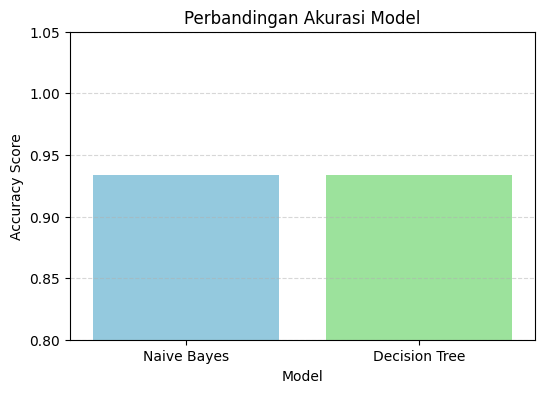

In [ ]:
# Hitung akurasi masing-masing model
akk_nb = accuracy_score(y_test, y_pred)
akk_dt = accuracy_score(y_test, y_pred_dt)


# === Cetak akurasi kedua model ===
print("\n=== Perbandingan Akurasi ===")
print(f"Akurasi Naive Bayes     : {akk_nb:.4f}")
print(f"Akurasi Decision Tree   : {akk_dt:.4f}")

# Buat DataFrame untuk visualisasi
accuracy_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Decision Tree'],
    'Accuracy': [akk_nb, akk_dt]
})

# Plot
plt.figure(figsize=(6, 4))
palette = {'Naive Bayes': 'skyblue', 'Decision Tree': 'lightgreen'}
sns.barplot(data=accuracy_df, x='Model', y='Accuracy', hue='Model', palette=palette, legend=False)
plt.ylim(0.8, 1.05)
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Accuracy Score')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

 ### ✅**Hasil Perbandingan Akhir**

1. Klasifikasi 1
 - Naive Bayes : 1.0
 - DecisionTree : 1.0
2. Klasifikasi 2
 - Naive Bayes : 0.96
 - DecisionTree : 0.96
3. Klasifikasi 3
 - Naive bayes : 0.9
 - DecisionTree : 0.96
4. Klasifikasi 4
 - Naive Bayes : 0.93
 - DecisionTree : 0.93